In [2]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("C:\\Users\\nikit\\Downloads\\student_clustering.csv")
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       200 non-null    float64
 1   iq         200 non-null    int64  
 2   placement  200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB


,cgpa,iq,placement
195,8.72,119,1
196,8.97,119,1
197,8.68,119,1
198,9.06,120,1
199,9.01,121,1


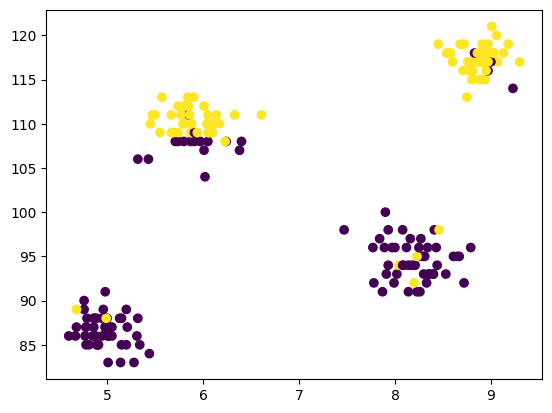

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [15]:
x=df.iloc[:,:-1]
print(x)
y=df.iloc[:,-1]
print(y,x.shape,y.shape)

     cgpa   iq
0    5.14   83
1    5.28   83
2    5.01   83
3    5.44   84
4    5.34   85
..    ...  ...
195  8.72  119
196  8.97  119
197  8.68  119
198  9.06  120
199  9.01  121

[200 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: placement, Length: 200, dtype: int64 (200, 2) (200,)


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)
x_test
x_test
y_test
y_train

7      0
35     0
12     0
61     0
189    1
      ..
163    1
19     0
144    1
104    0
62     0
Name: placement, Length: 190, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
print(x_train)
x_test=scaler.transform(x_test)
x_test

[[-1.06774431 -1.37231625]
 [-1.09866983 -1.12618023]
 [-1.43885057 -1.29027091]
 [ 0.9918954  -0.71595354]
 [ 1.02282092  1.33517994]
 [ 1.36300166  1.33517994]
 [ 1.10941238  1.41722528]
 [-0.99352306 -1.12618023]
 [ 0.81871248 -0.46981752]
 [-1.32751869 -1.37231625]
 [-1.3398889  -1.04413489]
 [ 0.52801258 -0.79799888]
 [ 1.1279677   0.92495324]
 [-0.88219119  0.76086256]
 [-0.73374868  0.51472655]
 [ 1.14652301  1.17108926]
 [ 1.26403999  1.17108926]
 [-1.16052088 -1.29027091]
 [ 1.07848686 -0.55186286]
 [ 0.64552956 -0.46981752]
 [ 0.91148905 -0.71595354]
 [ 1.15270811  1.17108926]
 [-0.9007465   0.76086256]
 [-1.24711234 -1.37231625]
 [-1.11104004 -1.12618023]
 [ 0.62078915 -0.6339082 ]
 [-0.98115285 -1.37231625]
 [-0.65952743  0.76086256]
 [ 1.23929957  1.33517994]
 [ 1.17744853  1.33517994]
 [-1.30896338 -1.37231625]
 [ 0.88674863 -0.71595354]
 [ 0.33627435 -0.30572684]
 [ 0.60841894 -0.71595354]
 [ 1.4248527   1.00699858]
 [ 0.80634228 -0.88004421]
 [ 0.71356571 -0.30572684]
 

array([[  7.77,  96.  ],
       [  8.79,  96.  ],
       [  8.34,  96.  ],
       [  8.78, 117.  ],
       [  5.88, 110.  ],
       [  8.9 , 117.  ],
       [  8.94, 115.  ],
       [  8.65,  95.  ],
       [  5.45, 110.  ],
       [  9.18, 119.  ]])

In [37]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf=LogisticRegression()

In [43]:

clf.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred=clf.predict(x_test)
print(y_pred)
print(y_test)

[1 1 1 1 1 1 1 1 1 1]
82     0
90     0
86     0
169    1
129    1
176    1
155    1
76     0
126    1
192    1
Name: placement, dtype: int64


In [50]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

0.6

<Axes: >

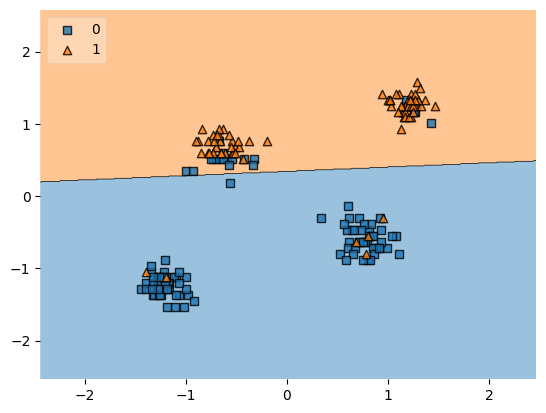

In [59]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)


In [60]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))